## Hypothesis testing

<img src="http://blog.yhathq.com/static/img/type-i-and-type-ii-errors.jpg"
width="500"/>

The basic idea of a hypothesis test is to compare the observed value of a test
statistic with the distribution that it would follow if a "null hypothesis" were
true. The null hypothesis is then rejected if the test statistic is too extreme
relative to this distribution.

<img src="http://images.flatworldknowledge.com/shafer/shafer-fig08_011.jpg" />

In some special cases, the distribution of the test statistic is known and we
can perform exact tests. However, often with test statistics of real-world
interest, the distribution is not known.

### Statistical significance

The result of a hypothesis test has "statistical significance" when it is very
**unlikely** to have occurred if the null hypothesis were true.

The significance level $\alpha$ of a study is the probability of mistakenly
rejecting the null hypothesis given that it is true. It is the threshold for the
$p$ value below which we assume the null hypothesis is false.

The $p$-value of a result is the probability of obtaining a result at least as
extreme if the null hypothesis is true.

So a result is **statistically significant** when $p < \alpha$.

**Warning:** a result may be statistically significant but have no practical
significance. It may have a small effect size or not be reproducible. Some
journals have banned the use of significance testing altogether from papers they
publish, requiring authors to use other measures to evaluate hypotheses and
impact.

### Scenario: is a claim right or wrong?

A family therapist claims that children watch an average of 15.2 hours of TV per
week. Surprised by this claim, a psychologist collects some data on the amount
of TV children watch by surveying some parents. The results are:

In [1]:
%run setup.ipy

In [4]:
FILENAME = 'data/tv_hours2.txt'

In [5]:
data = pd.read_csv(FILENAME, index_col='name')
data.head()

,sex,hours of TV
name,,
Alden,boy,22
Winifred,girl,3
Maurice,girl,18
Katrina,girl,18
Colonel,boy,12


Text(0.5,0,'Hours of TV watched per week')

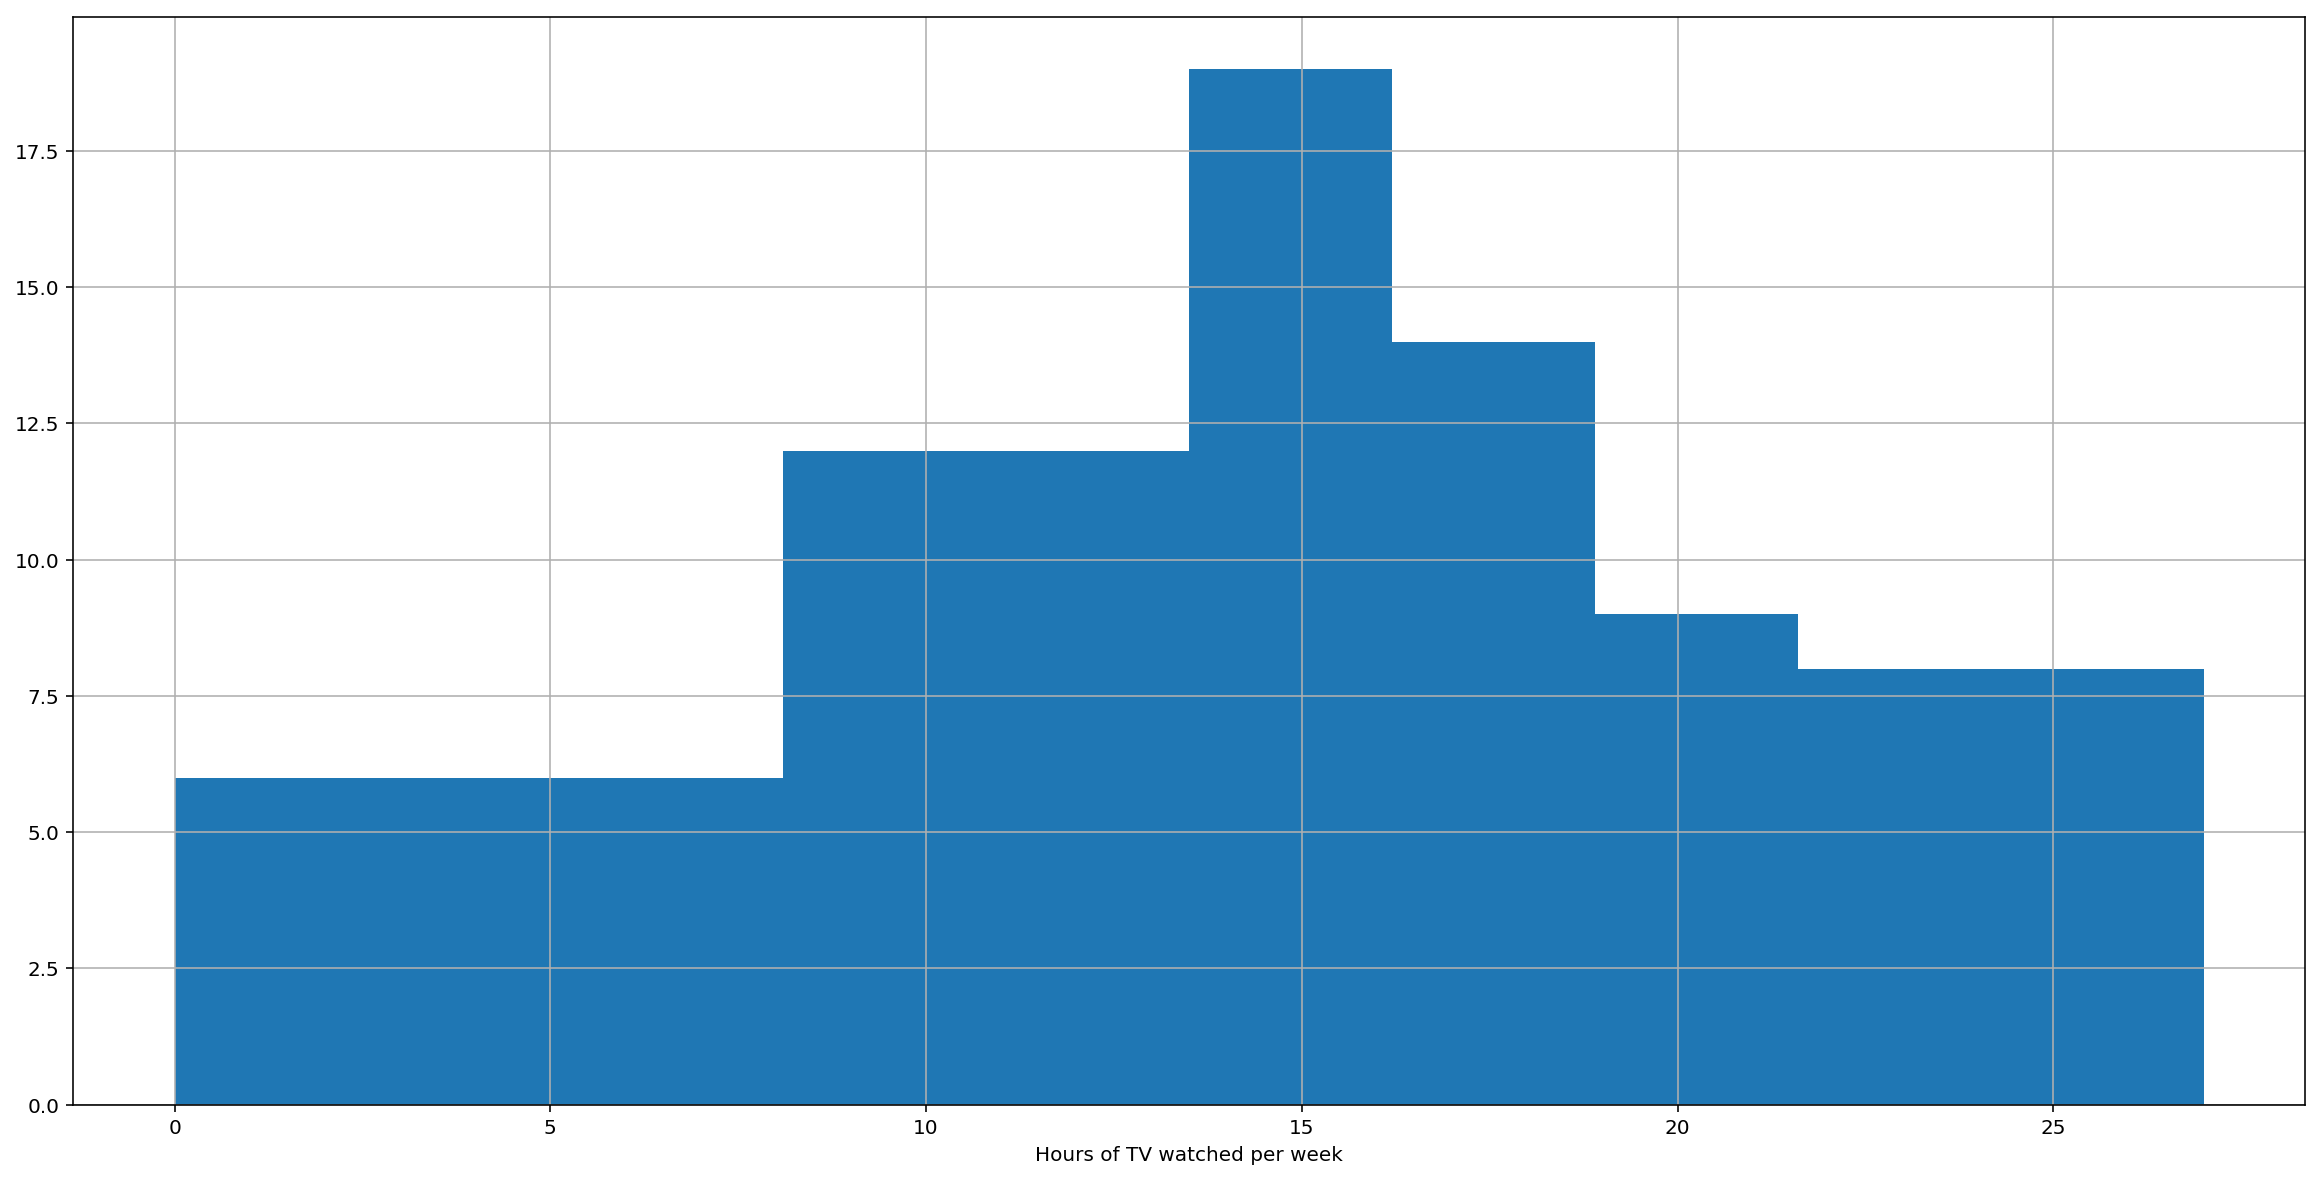

In [6]:
data['hours of TV'].hist()
plt.xlabel('Hours of TV watched per week')

In [7]:
CLAIMED_AVERAGE = 15.2

First: do the psychologist's findings differ significantly from the family
therapist's claim?

In [8]:
ALPHA = 0.05

### Hypothesis testing in classical statistics

We use the <em>Student's t test</em>. See here:
https://en.wikipedia.org/wiki/Student%27s_t-test.

Note that this makes an assumption that the sample means are **normally
distributed**, with equal (but unknown) variances for the null and alternative
hypotheses. If the data is far from normal and the sample size is small, the $t$
test can give misleading results.

In [9]:
from scipy.stats import t

In [10]:
(t_statistic, p_value) = stats.ttest_1samp(data['hours of TV'], CLAIMED_AVERAGE)

In [11]:
t_statistic, p_value

(-1.3237115959983619, 0.18864738485707902)

The simplest test is whether the $p$ value is smaller than the significance
level $\alpha$ of the study (e.g. 5%).

In [12]:
if p_value <= ALPHA:
    print('Reject null hypothesis. Mean is different, or treatment did have an effect.')
else:
    print('Did not see evidence for a difference / an effect.')

Did not see evidence for a difference / an effect.


Another way of determining this is as follows (with the same result):

If the <em>t statistic</em> is near zero, we conclude the sample mean is not
significantly different from the hypothesized value; there is no support for
rejecting the original hypothesis (or no support for a treatment effect.)

In [13]:
df = len(data) - 1
print('df={} degrees of freedom'.format(df))

df=99 degrees of freedom


Use <b>ppf</b>: "percent point function" to give percentiles

In [14]:
critical_lower = t.ppf(ALPHA, df)
critical_upper = t.ppf(1 - ALPHA, df)

In [15]:
critical_lower, critical_upper

(-1.6603911559963902, 1.6603911559963895)

In [16]:
if critical_lower <= t_statistic <= critical_upper:
    print('Did not see evidence for a difference / an effect.')
else:
    print('Reject null hypothesis. Mean is different, or treatment did have an effect.')

Did not see evidence for a difference / an effect.


### Justification

We can illustrate where the test statistic is in relation to the rejection
region as follows.

First we set up the $x$ axis of our plot:

In [17]:
a = t.ppf(0.001, df)
b = t.ppf(0.999, df)
x = np.linspace(a, b, 100)

Here is the probability density of the $t$ distribution with the critical region
between the lines and the red x showing the actual value of the $t$ statistic:

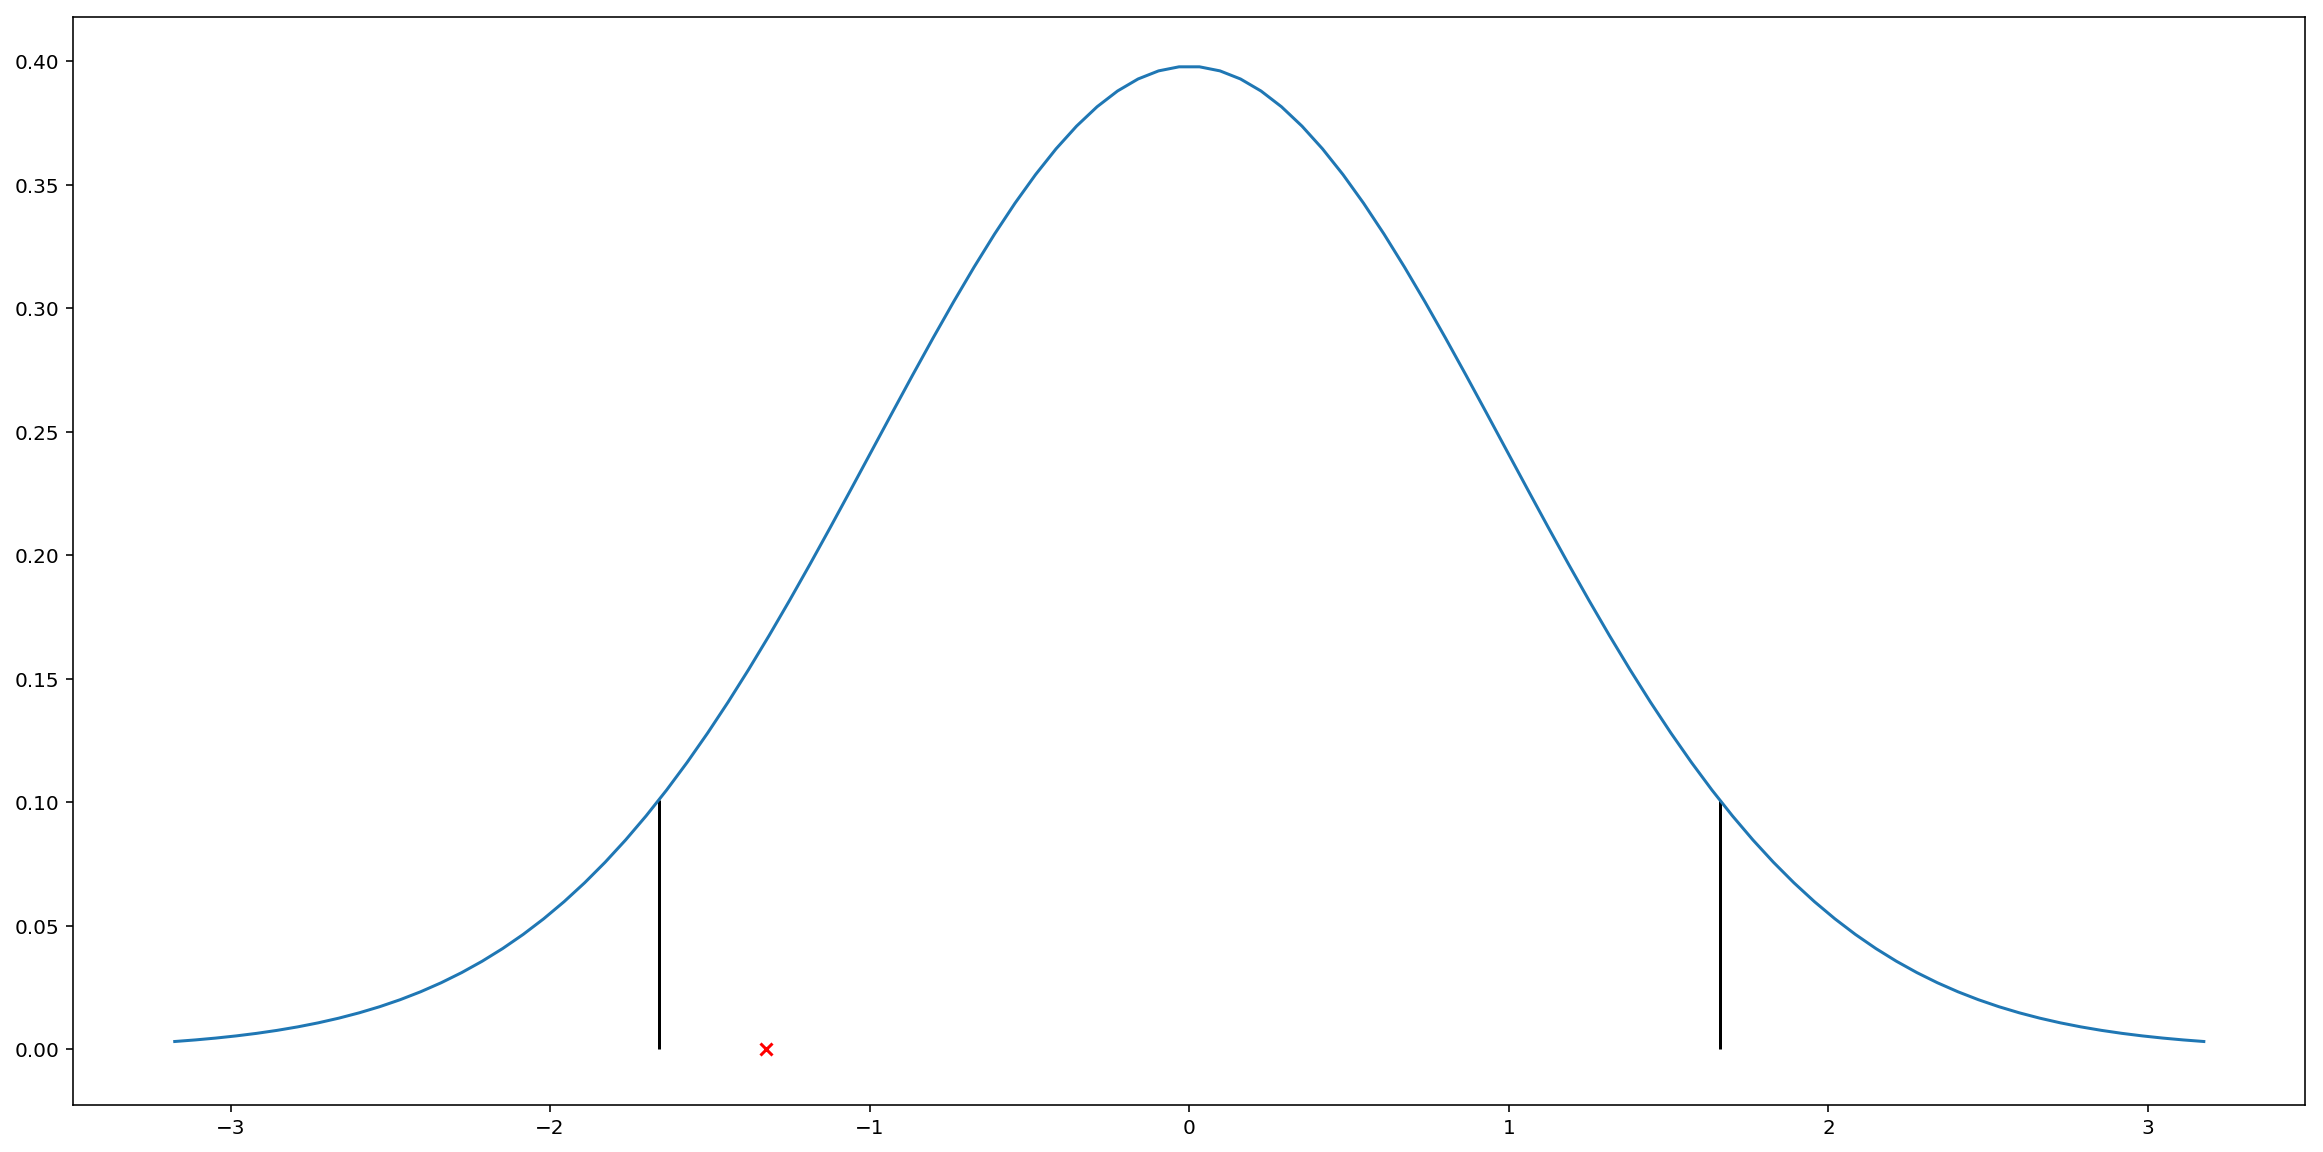

In [18]:
plt.plot(x, t.pdf(x, df))
plt.vlines([critical_lower, critical_upper], 0, t.pdf([critical_lower, critical_upper], df))
plt.scatter(t_statistic, 0, color='red', marker='x')

### Is a treatment effective?

The same procedure above can be used to answer the question of whether a
treatment or intervention was effective.

In other words, does the treatment cause scores to increase or decrease, or does
it have no effect. Specifically, what happens to the population mean after
treatment?

The <em>null hypothesis</em> is that the treatment has no effect (e.g. on body
weight) for the population (e.g. of infants). We ask: is there enough evidence
to reject this hypothesis? The default assumption is that it is correct, and we
require 'more' evidence to reject it than to accept it.

### Significant difference?

Often we want to answer the question: "Is there a significant difference between
two sets of data?"

For example, with the data above: is there a significant difference between how
much TV boys and girls watch?

In [19]:
hours_boys = data.query('sex == "boy"')['hours of TV']
hours_girls = data.query('sex == "girl"')['hours of TV']

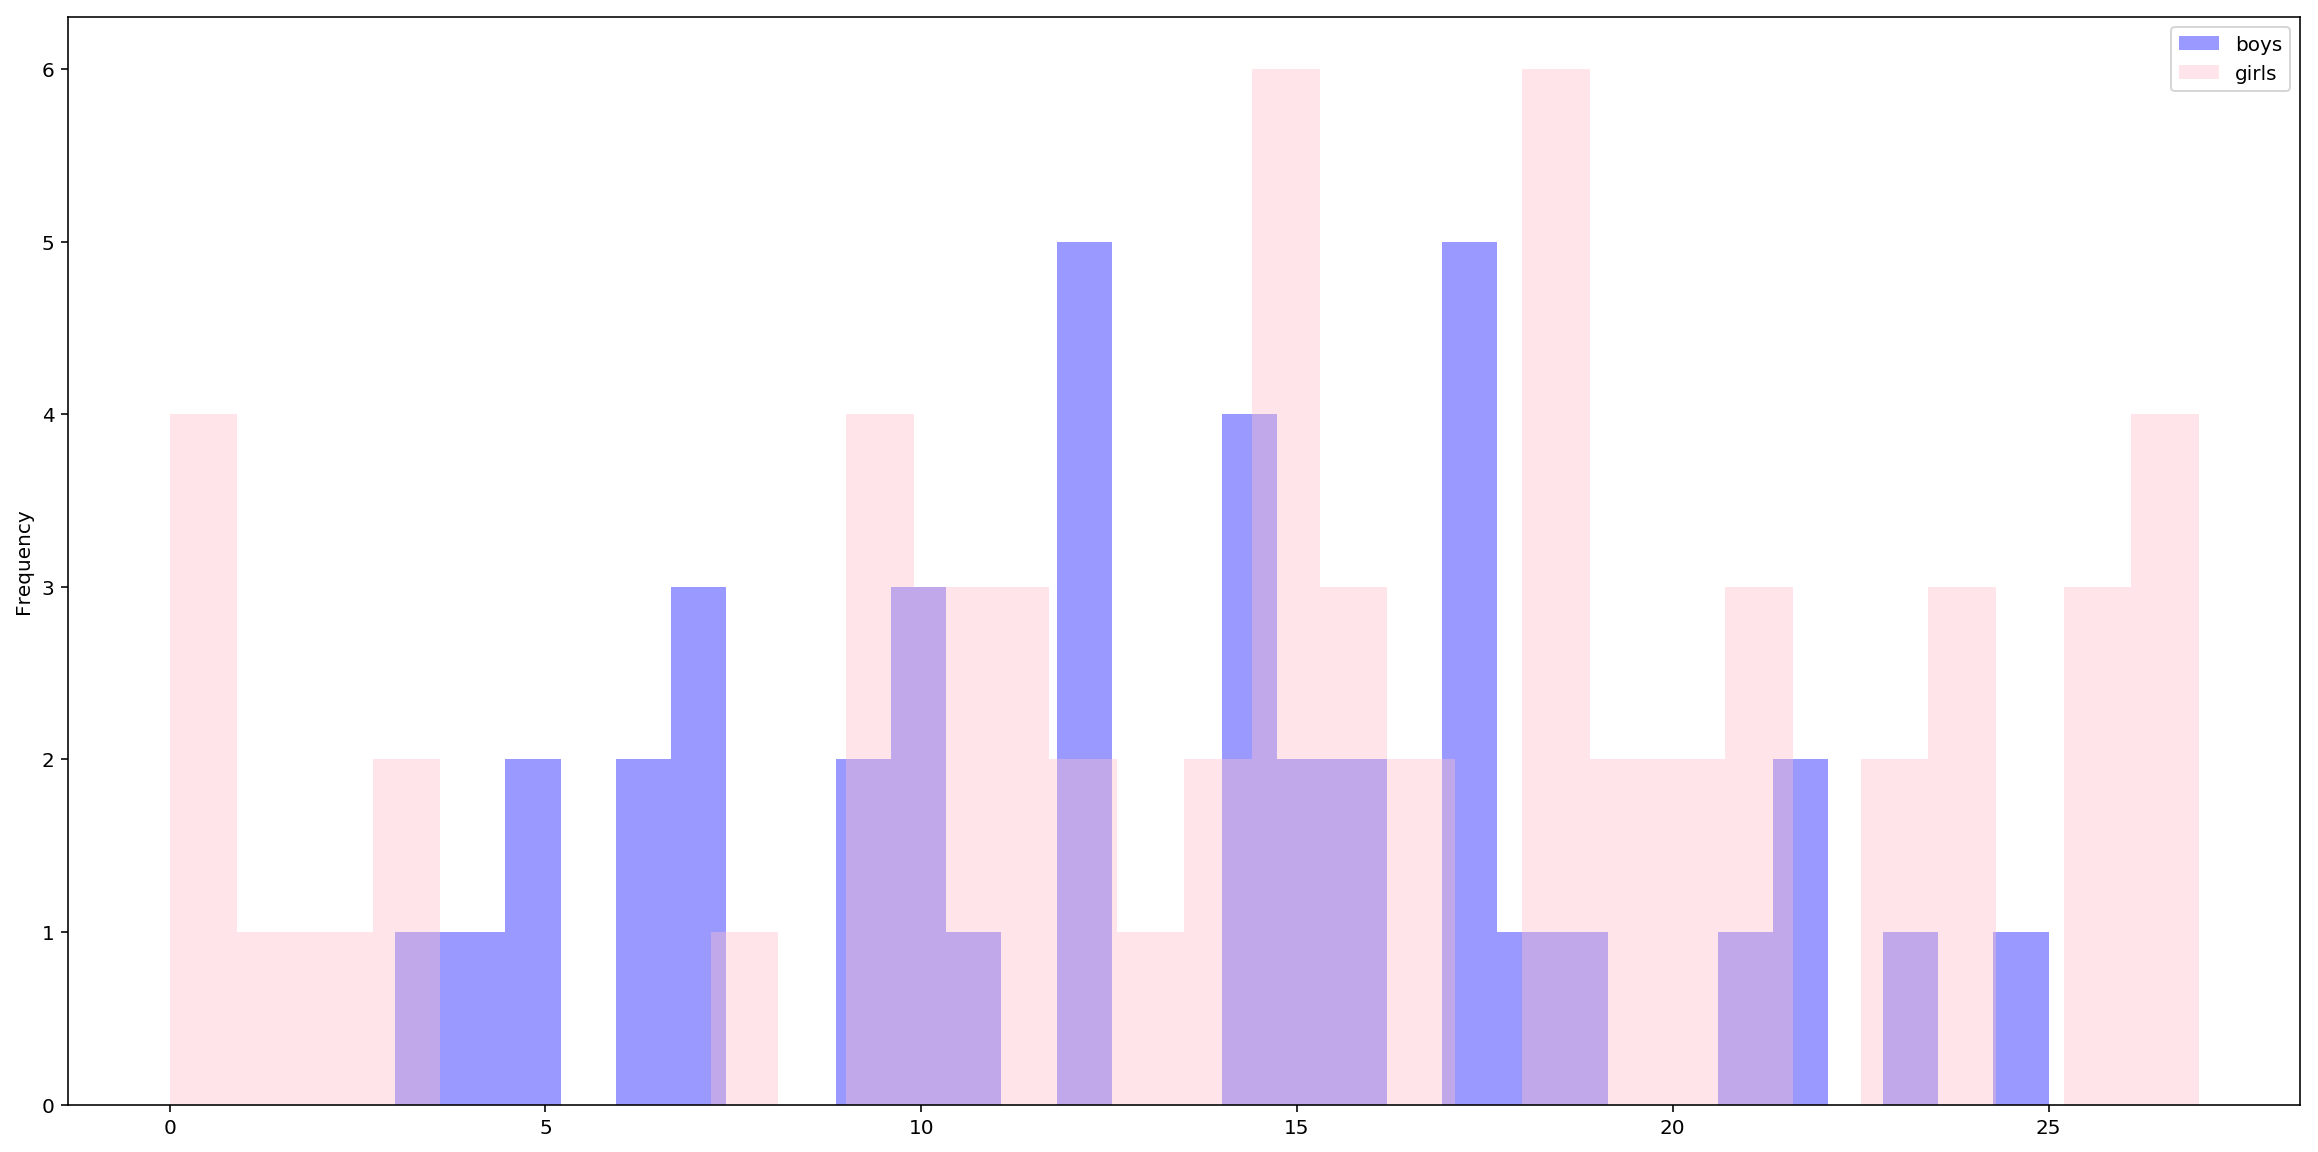

In [20]:
hours_boys.plot(kind='hist', alpha=0.4, bins=30, color='blue')
hours_girls.plot(kind='hist', alpha=0.4, bins=30, color='pink')
plt.legend(['boys', 'girls'])

There is more data for girls, but it looks as though the data have a similar
distribution.

What about the means?

In [21]:
hours_boys.mean()

13.05

In [22]:
hours_girls.mean()

15.1

There is quite a difference. Is it "statistically significant"?

### Nonparametric hypothesis tests

To answer this question we first use the **Mann-Whitney U test**, which is
**nonparametric**. Unlike the $t$ test above, it does not assume that the data
(or means) is normally distributed. It assumes only that observations from both
groups are **independent**.

We will take the null hypothesis $H_0$ to be that the distributions of both
groups are equal, and the alternative hypothesis to be that boys watch less TV
than girls.

In [23]:
from scipy.stats import mannwhitneyu

In [24]:
result = mannwhitneyu(hours_boys, hours_girls, alternative='less')
result

MannwhitneyuResult(statistic=957.5, pvalue=0.0440987078850512)

In [25]:
if result.pvalue > 0.05:
    print('Insufficient evidence for a difference.')
else:
    print('We reject the hypothesis. The difference between the TV time of girls and boys is significant at the 5% level.')

We reject the hypothesis. The difference between the TV time of girls and boys is significant at the 5% level.


The **Kolmogorov-Smirnov test** is a different test of the same question: are
the distributions the same, or are they different (so it is a **two-sided**
test).

In [26]:
from scipy.stats import ks_2samp

In [27]:
result2 = ks_2samp(hours_boys, hours_girls)
result2

Ks_2sampResult(statistic=0.24166666666666659, pvalue=0.10272251099060142)

In [28]:
if result2.pvalue > 0.05:
    print('Insufficient evidence for a difference.')
else:
    print('We reject the hypothesis. The difference between the TV time of girls and boys is significant at the 5% level.')

Insufficient evidence for a difference.


Note that the results may be different from the two tests.

For more information about non-parametric testing methods in statistics, see

[https://en.wikipedia.org/wiki/Nonparametric_statistics#Methods](https://en.wikipedia.org/wiki/Nonparametric_statistics#Methods)